In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\wdbc.data.csv",header=None)

In [3]:
column_names=['ID no.', 'Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension'] 

In [4]:
### Putting column names in the dataset
data.columns=column_names
data.drop("ID no.",axis=1,inplace=True)
data.head()

,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




# Exploratory Data Analysis  

In [5]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [7]:
data.isna().sum()

Diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

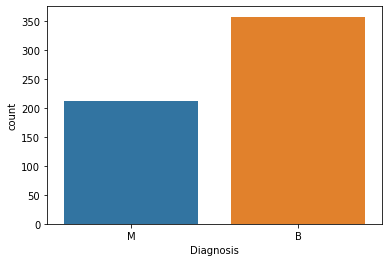

In [8]:
sea.countplot(data['Diagnosis'],label="count")
plt.show()

In [9]:
### Converting Target Variable (Diagnosis) into Categorical Variable
data['Diagnosis'] = data['Diagnosis'].astype('category')

In [10]:
### Denoting Malignant as 1 and Benign as 0 
data['Diagnosis'] = data['Diagnosis'].map({'B':0, 'M':1})
data.head()

,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
### Taking out important features
df=data.drop(['radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension'],axis='columns')  
df.head()

,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [12]:
### Correlation between variables 
correlation=df.corr()

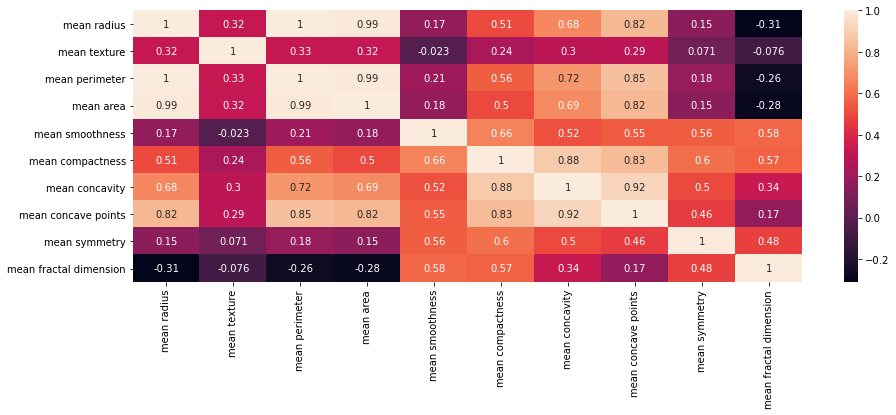

In [13]:
plt.figure(figsize=(15,5))
sea.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.show()

# Dimensionality Reduction - PCA

In [14]:
data.keys()

Index(['Diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data)

StandardScaler()

In [16]:
sc_data=sc.transform(data)
print(sc_data)

[[ 1.29767572  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.29767572  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.29767572  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 1.29767572  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.29767572  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.77060855 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(sc_data)

PCA(n_components=3)

In [18]:
pca_data=pca.transform(sc_data)

In [19]:
pca_data.shape

(569, 3)

In [20]:
print(pca_data)

[[ 9.22577011  2.11619563 -0.94810915]
 [ 2.6558016  -3.78477586 -0.50282496]
 [ 5.89249212 -1.00557896 -0.48714898]
 ...
 [ 1.53007727 -1.95887147  0.46571815]
 [10.40500789  1.84907792 -1.77932757]
 [-5.50486158 -0.76634841  1.36862306]]


### Eigen Vectors

In [21]:
print(pca.components_)

[[ 0.21691695  0.21639914  0.10359936  0.2245478   0.21796464  0.13764549
   0.23150388  0.25122179  0.2552664   0.1330126   0.05797189  0.20090409
   0.01547414  0.20563036  0.19798194  0.01123624  0.1619218   0.14578435
   0.1762679   0.03832541  0.09508414  0.22558983  0.10501867  0.23364163
   0.22196962  0.12530106  0.20447639  0.22307483  0.24628844  0.12066328
   0.12672101]
 [-0.07760994 -0.22654473 -0.05826196 -0.20762951 -0.22322434  0.18876038
   0.15847307  0.06786768 -0.02722028  0.19321967  0.36761956 -0.09715581
   0.09118826 -0.08069084 -0.14355563  0.20531469  0.23886735  0.203226
   0.13704859  0.1860032   0.28433173 -0.21289639 -0.04513536 -0.19259202
  -0.21188718  0.17247591  0.14766283  0.10308807 -0.00243309  0.14206245
   0.27644912]
 [-0.10382598  0.00252701  0.05475077  0.00185393  0.04015101 -0.10283457
  -0.06714559  0.01047679 -0.01704756 -0.04031047 -0.02450881  0.27490993
   0.36159518  0.27380074  0.22546846  0.30017483  0.15800472  0.18043615
   0.22824

### Eigen Values

In [22]:
print(pca.explained_variance_)

[13.94227406  5.73643378  2.85186154]


In [23]:
print(pca.explained_variance_ratio_)

[0.44896035 0.18472104 0.09183385]


#  Classification Methods - DecisionTree  &  Random Forest

In [24]:
# Splitting Dataset
x=df.drop('Diagnosis', axis=1)
y=df['Diagnosis']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

# Decision Tree

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
dtpredict=dt.predict(x_test)

In [27]:
accuracy_score(y_test,dtpredict)

0.9298245614035088

# Random Forest 

In [28]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [29]:
rfpredict=rf.predict(x_test)

In [30]:
accuracy_score(y_test,rfpredict)

0.9736842105263158

### Confusion Matrix

In [31]:
confusion_matrix(y_test,dtpredict)

array([[72,  3],
       [ 5, 34]], dtype=int64)

In [32]:
confusion_matrix(y_test,rfpredict)

array([[72,  3],
       [ 0, 39]], dtype=int64)